# inicio en scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## optimizacion

In [2]:
from scipy.optimize import minimize

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2) # selecciona el valor minimo

In [4]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [5]:
res.x # obtengo la informacion que estoy buscando

array([2.99999999])

In [6]:
res.x[0] # obtengo el valor y no el array

2.999999992549203

In [17]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2   # escribo la funcion como un vector
# coinstruyo mis inecuaciones
cons = ({'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
        {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
        {'type': 'ineq', 'fun': lambda x: -x[0]+2*x[1]+2}
       )
#construyo mis fronteras
bnds = ((0, None), (0, None))
res = minimize(f, (2,0), bounds = bnds, constraints = cons)

In [18]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [19]:
res.x

array([1.4, 1.7])

In [16]:
minimize? # con esto obtengo toda la informacion del metodo

## interpolacion

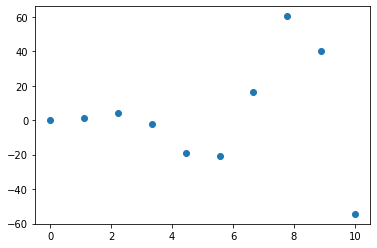

In [22]:
x = np.linspace(0, 10, 10) # generamos la data de manera aleatoria
y = x**2 * np.sin(x)
plt.scatter(x, y)

In [24]:
# pero si queres saber los valores entre esos puntos
from scipy.interpolate import interp1d # llamo al metodo de interpolacion de scipy

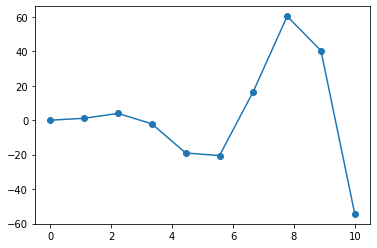

In [36]:
f =  interp1d(x, y, kind = 'linear') # realizo una interpolacion lineal
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

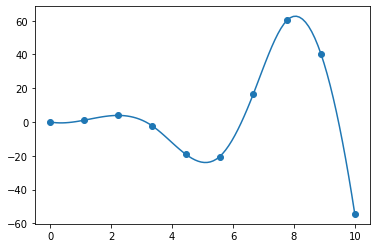

In [37]:
f =  interp1d(x, y, kind = 'cubic') # realizo una interpolacion cuadratica o cubica
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## Ajuste de curva

In [29]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2


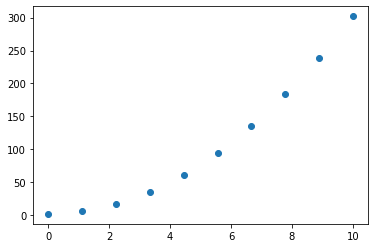

In [30]:
plt.scatter(x_data, y_data)# gemero los puntos que se comporta segun la funcion

In [31]:
# AHora lo que quiero hacer es ajustar la curva curva a esos valores
from scipy.optimize import curve_fit

In [33]:
def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0 = (1, 1)) # popt son llos valores mas optimimos y pcov es la covarianza, p0 es el punto de inicio

In [34]:
popt # me da los valores de la funcion

array([3., 2.])

In [35]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])


The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data, por ejemplo la oscilacion de una masa-resorte

In [38]:

t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

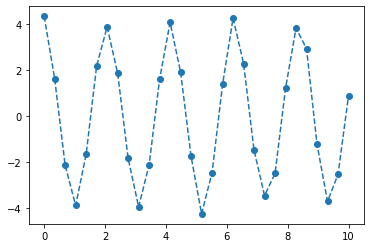

In [39]:
plt.plot(t_data, y_data, 'o--')


$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

. $\omega = 2 \pi (1/2) = \pi$
. $A=4$
. $\phi = 0$

In [40]:
def func(x, A, w, phi):
    return A*np.cos(w*x + phi)
popt, pcov = curve_fit(func, t_data, y_data, p0 = (4, np.pi, 0))

In [43]:
A, w, phi = popt

In [44]:
popt # estos son los parametros

array([3.94836219, 2.9989952 , 0.10411352])

In [47]:
pcov # matriz de covarianza 

array([[ 2.61882716e-03, -4.94132477e-06,  3.47405232e-05],
       [-4.94132477e-06,  1.85637431e-05, -9.60755703e-05],
       [ 3.47405232e-05, -9.60755703e-05,  6.63424255e-04]])

In [48]:
np.diag(pcov)# la diagonal principal me da la covarianza el error en lo s parametros A, w, phi

array([2.61882716e-03, 1.85637431e-05, 6.63424255e-04])

In [50]:
np.sqrt(np.diag(pcov)) # desviacion del error A, w, phi, osea la estimacion del error de los parametros 

array([0.05117448, 0.00430857, 0.02575702])

In [45]:
t =np.linspace(0, 10, 100)
y = func(t, A, w, phi)

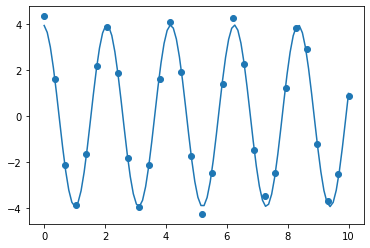

In [46]:
plt.scatter(t_data, y_data) # graficamos los datos
plt.plot(t, y)# graficamos la prediccion

que sucede si ahora hago mi np.pi = 1, o sea, cambio mi w

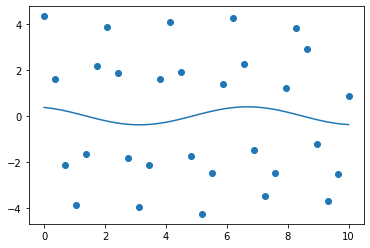

In [51]:
def func(x, A, w, phi):
    return A*np.cos(w*x + phi)
popt, pcov = curve_fit(func, t_data, y_data, p0 = (4, 1, 0))
A, w, phi = popt
t =np.linspace(0, 10, 100)
y = func(t, A, w, phi)
plt.scatter(t_data, y_data) 
plt.plot(t, y)

como ae puede observar, no se aprecia un correcto ajuste
lo que combiene es ver bien los datos y establecer cierto parametros iniciale s, antes de ajustar el modelo

## funciones especiales

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

In [52]:
from scipy.special import legendre


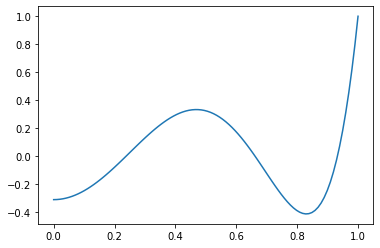

In [53]:
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

In [54]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

In [55]:
legendre(6)(x)

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

Laplace's Equation in Polar Coordinates

In [56]:
from scipy.special import jv

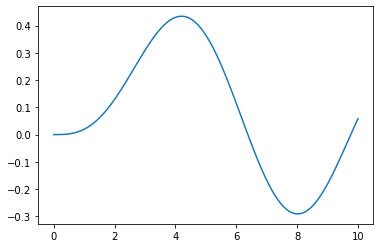

In [59]:
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

In [60]:
jv(3,x)

array([ 0.00000000e+00,  2.14573565e-05,  1.71330666e-04,  5.76398714e-04,
        1.36018348e-03,  2.64136539e-03,  4.53225039e-03,  7.13730541e-03,
        1.05517779e-02,  1.48604144e-02,  2.01362920e-02,  2.64397752e-02,
        3.38176108e-02,  4.23021684e-02,  5.19108382e-02,  6.26455908e-02,
        7.44927044e-02,  8.74226650e-02,  1.01390238e-01,  1.16334717e-01,
        1.32180336e-01,  1.48836863e-01,  1.66200340e-01,  1.84153996e-01,
        2.02569292e-01,  2.21307114e-01,  2.40219086e-01,  2.59148998e-01,
        2.77934329e-01,  2.96407863e-01,  3.14399357e-01,  3.31737277e-01,
        3.48250553e-01,  3.63770358e-01,  3.78131880e-01,  3.91176076e-01,
        4.02751387e-01,  4.12715397e-01,  4.20936412e-01,  4.27294966e-01,
        4.31685199e-01,  4.34016135e-01,  4.34212813e-01,  4.32217281e-01,
        4.27989422e-01,  4.21507631e-01,  4.12769297e-01,  4.01791123e-01,
        3.88609255e-01,  3.73279217e-01,  3.55875674e-01,  3.36491993e-01,
        3.15239631e-01,  

## Derivadas

nunpy nos entrega un array dde valores derivado en cambio scipy nos deriva la funcion 

In [61]:
from scipy.misc import derivative

In [63]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 100)

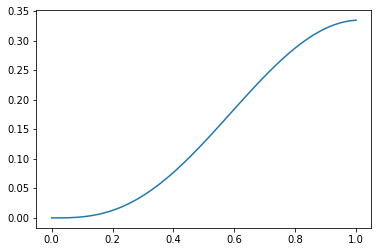

In [64]:
plt.plot(x, f(x))

In [71]:
x1 = derivative(f, x, dx = 1e-6) # derivara todos los puntos del array x
x2 = derivative(f, x, dx = 1e-6, n = 2)# derivada segunda

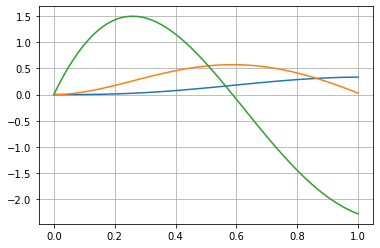

In [73]:

plt.plot(x, f(x))
plt.plot(x, x1)
plt.plot(x, x2)
plt.grid()

## integracion



muy similar a la diferencia vista con numpy y scipy



In [74]:
from scipy.integrate import quad

In [75]:
intergrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(intergrand, 0, 1)

In [76]:
integral

0.10246777930717413

In [77]:
integral_error

1.1376208786903388e-15

integrales dobles


In [82]:
from scipy.integrate import dblquad


In [84]:
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [85]:
integral

0.590090324408853

In [86]:
integral_error

2.0545915475811425e-14

integrales multidimensionales

In [88]:
from scipy.integrate import nquad

In [89]:
nquad?

## Ecuaciones diferenciales

ODEs de primer orden

la ecuacion de la friccion del aire de un objeto al caer



In [90]:
from scipy.integrate import odeint

In [91]:
# brindar informacion sobre la ecuacion diferencial

def dvdt(v, t):
    return 3*v**2 - 5

v0 = 0

In [93]:
#resuelvo la ecuacion diferencial
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t) #paso el metodo con la funcion, la condicion inicial y la variable

In [96]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

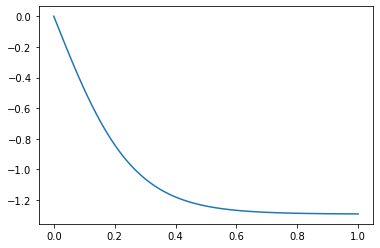

In [98]:
plt.plot(t, sol.T[0])

conjunto de ODEs de primer orden

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$
Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [99]:
def dSdx(S, x):#geberammos un vector y lo derivamos
    y1, y2 = S
    return [y1 + y2**2+3*x, 3*y1+y2**3-np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)


In [101]:
x = np.linspace(0, 1, 100)
sol= odeint(dSdx, S_0, x)

In [102]:
sol# genera un array de soluciones

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [105]:
# tomo las soluciones
y1 =sol.T[0]
y2 =sol.T[1]

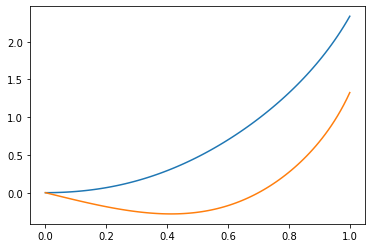

In [106]:
#grafico las soluciones
plt.plot(x, y1)
plt.plot(x, y2)

ODEs de segundo orden

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$
Scipy can only solve coupled first order ODEs, but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$$$d \theta / dt = \omega $$
Let $S = (\theta, \omega)$

In [108]:
# scipy no puede resolver un ODEs de segundo orden, pero si podemos descomponer la ODEs de SO eb dos de PO
def dSdt(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)


In [109]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

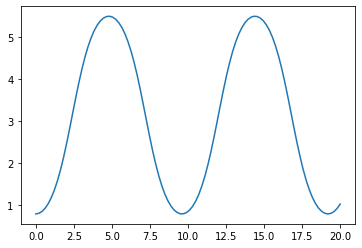

In [111]:
plt.plot(t, theta)


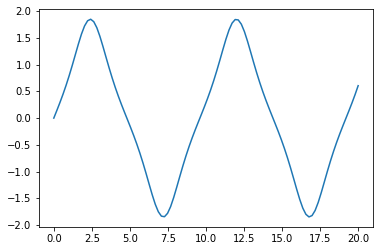

In [112]:
plt.plot(t, omega)

## Trasformada de fourier

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
$k/N$ represents a specific frequency (dimensionless)
can be converted to a frequency (Hz) if you know the spacing in $x$


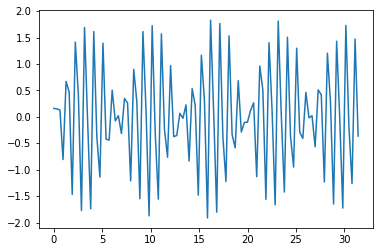

In [116]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(t, x)

In [117]:
from scipy.fft import fft, fftfreq

In [118]:
N =len(x)
y = fft(x)

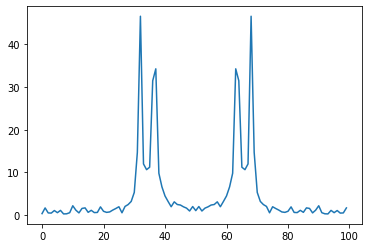

In [119]:
plt.plot(np.abs(y)) # se obtiene una grafica simetrica, al tomar valores absolutos, la parte de la izquierda seria lo negativo

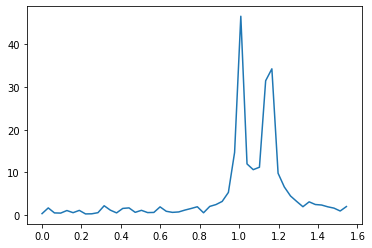

In [120]:
N =len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2] # agregamos el dt en la serie de tiempo yobtengo el primer elemento
plt.plot(f, np.abs(y))

## Ejemplos